## 이미지 데이터 분류 : MNIST - 딥러닝 기본 프레임 만들기

딥러닝 모델 구현  
(1) 모델 설정  
(2) 모델 컴파일  
(3) 모델 실행(학습)  
(4) 모델 평가

ModelCheckpoint() : 모델 성과 저장/로드   
EarlyStopping : 모델 최적화 단계에서 학습 자동 중단 설정     
모델 저장/로드

In [1]:
# 이미지 데이터 로드 및 전처리

from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 정규화
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# 원-핫 인코딩 (바이너리화)
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)


**딥러닝 적용 (프레임 설정)**

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# (1) 모델 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax')) # 이진 분류가 불가능하서 소프트 맥스 사용

##### 활성화 함수
- 은닉층 : relu
- 출력층 : softmax

    - relu 함수
        - x가 0보다 작을 때는 모든 값을 0으로 처리하고
        - 0보다 클 때는 x를 그대로 사용

    - softmax 함수 
        - 3개 이상으로 분류하는 다중 클래스 분류에서 사용하는 활성화 함수


In [3]:
# (2) 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 손실 함수(오차 함수) : categorical_crossentropy
# 최적화 알고리즘 : adam 
# Adam(Adaptive Moment Estimation)
# 각 파라미터마다 다른 크기의 업데이트를 적용하는 방법


##### 모델 성과 저장
- 모델 최적화 단계에서 학습 자동 중단
- 10회 이상모델의 성과 향상이 없으면 자동으로 학습을 중단

In [4]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [5]:
# 모델 저장할 디렉터리 생성
# 현재 디렉터리에 model 디렉터리 생성
# 존재하지 않으면 생성

MODEL_DIR = './model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [6]:
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"

In [7]:
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor='val_loss', 
                               verboose=1, #verbose:설명
                               save_best_only=True)

In [8]:
# 10회 이상 모델의 성과 향상이 없으면 자동으로 학습을 중단
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 10번도 동안 향상 효과가 없으면 중단

In [ ]:
# (3) 모델 실행 (학습)
# 새로운 콜백 사용해서 모델 훈련
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=30, 
                    batch_size=200,
                    #verbose=1,
                    callbacks=[early_stopping_callback, checkpointer])

Epoch 1/30
300/300 [==============================] - 1s 3ms/step - loss: 0.3010 - accuracy: 0.9165 - val_loss: 0.1525 - val_accuracy: 0.9566
Epoch 2/30
300/300 [==============================] - 1s 2ms/step - loss: 0.1261 - accuracy: 0.9640 - val_loss: 0.1096 - val_accuracy: 0.9673
Epoch 3/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0835 - accuracy: 0.9760 - val_loss: 0.0840 - val_accuracy: 0.9733
Epoch 4/30
217/300 [====================>.........] - ETA: 0s - loss: 0.0602 - accuracy: 0.9834

In [42]:
# (4) 모델 평가
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


313/313 [==============================] - 0s 952us/step - loss: 0.0660 - accuracy: 0.9813

 Test Accuracy: 0.9813


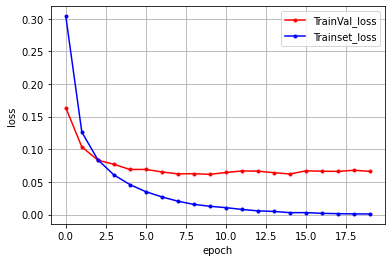

In [43]:
# val_loss와 loss 그래프로 표현

import matplotlib.pyplot as plt
import numpy

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='TrainVal_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


#### 모델 저장

1. 모델 가중치 저장
- model.save_weights(경로 및 이름)
2. 모델 저장
- model.save(경로 및 이름)
3. 모델 가중치 load
- model.load_weights(경로 및 이름)
4. 모델 load
- load_model(경로 및 이름)

In [20]:
model.save_weights('./model/my_weights')

In [21]:
model.load_weights('./model/my_weights')

In [22]:
loss, acc = model.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 999us/step - loss: 0.0661 - accuracy: 0.9829


In [23]:
# 전체 모델 저장 및 load
from tensorflow.keras.models import load_model

# 모델 저장
model.save('model/my_model')


INFO:tensorflow:Assets written to: model/my_model\assets


In [24]:
modelFin = load_model('model/my_model')

In [25]:
loss, acc = modelFin.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 738us/step - loss: 0.0661 - accuracy: 0.9829


In [27]:
modelChk = load_model('model/01-0.1508.hdf5')

In [28]:
loss, acc = modelChk.evaluate(X_test, Y_test)

313/313 [==============================] - 0s 736us/step - loss: 0.1508 - accuracy: 0.9567


**보통 모델은 hdfs5 or h5로 저장함**